In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("train.csv")

In [31]:
print(pd.unique(df.transmission))

['Automatic' 'Manual' 'Semi-Auto']


In [32]:
def f(s):
    if s=='Automatic':
        return 1
    elif s=='Manual':
        return 0
    elif s=='Semi-Auto':
        return 2
    else:
        return -1
df.transmission = df.transmission.apply(f)

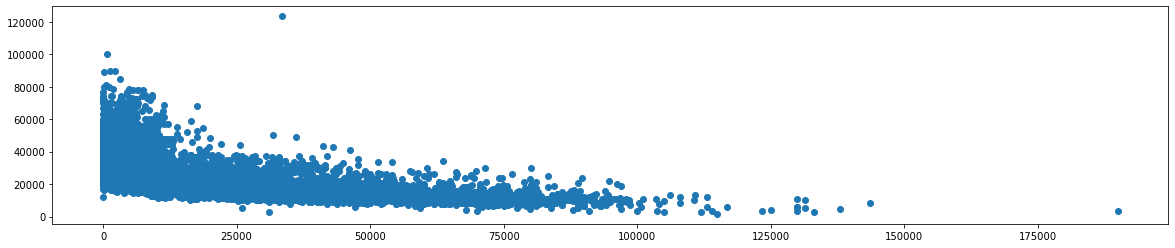

In [33]:
plt.figure().set_figwidth(20)
plt.scatter(df.mileage,df.price)
plt.show()


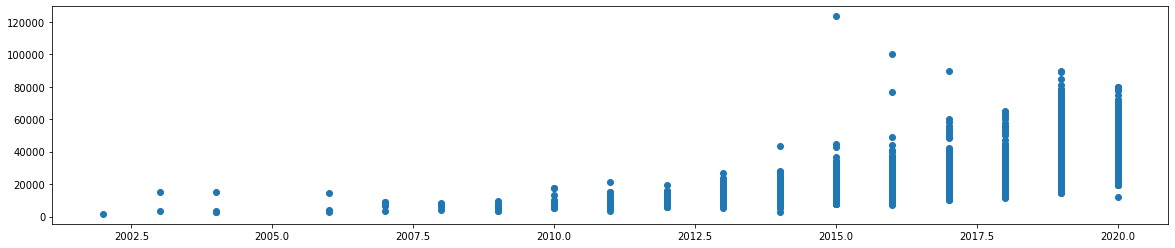

In [34]:
plt.figure().set_figwidth(20)
plt.scatter(df.year,df.price)
plt.show()


In [35]:
col = pd.unique(df.fuelType)
def f2(s):
    for c in range(len(col)):
        if s==col[c]:
            return c
    return 0
df.fuelType = df.fuelType.apply(f2)
print(col)

['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']


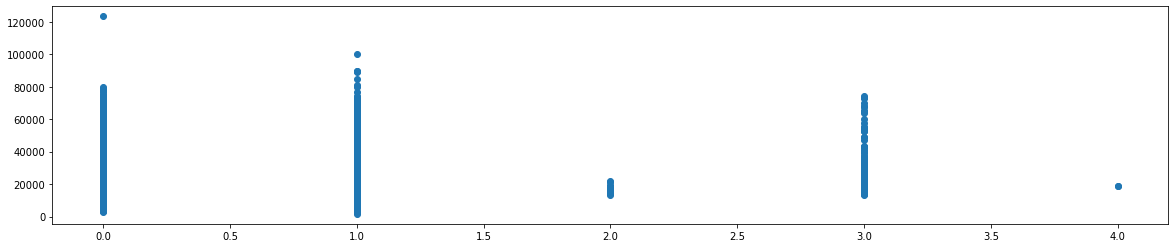

In [36]:
plt.figure().set_figwidth(20)
plt.scatter(df.fuelType,df.price)
plt.show()
